<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle


from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
from sklearn.linear_model import Ridge

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here:` ***Фиксация сидов необходима для воспроизводимости результатов. Без фиксации сида при каждом перезапуске ячеек кода будут получаться разные результаты метрик (в тех алгоритмах, где используются генераторы псевдослучайных чисел)*** 

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [4]:
print("Случайные 30 строк тренировочного датасета:")
display(df_train.sample(30))

print("Первые и последние 5 объектов тестового датасета:")
display(df_test.head(5))
display(df_test.tail(5))

print("Пропуски в трейне:")
na_counts_train = df_train.isnull().sum()
display(na_cols_train := na_counts_train[na_counts_train > 0])
print("Список колонок с пропусками в трейне:")
display(na_cols_train_list := na_cols_train.index.tolist())

print("Пропуски в тесте:")
na_counts_test = df_test.isnull().sum()
display(na_cols_test := na_counts_test[na_counts_test > 0])
print("Список колонок с пропусками в тесте:")
display(na_cols_test_list := na_cols_test.index.tolist())

print("Количество дубликатов в трейне")
display(duplicates_count_train := df_train.duplicated().sum())

print("Количество дубликатов в тесте") # это так, посмотреть, избавляться от них не надо!
display(duplicates_count_test := df_test.duplicated().sum())

Случайные 30 строк тренировочного датасета:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


Первые и последние 5 объектов тестового датасета:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


Пропуски в трейне:


mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

Список колонок с пропусками в трейне:


['mileage', 'engine', 'max_power', 'torque', 'seats']

Пропуски в тесте:


mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64

Список колонок с пропусками в тесте:


['mileage', 'engine', 'max_power', 'torque', 'seats']

Количество дубликатов в трейне


985

Количество дубликатов в тесте


62

In [5]:
# Дашборд для трейна
profile_train = ProfileReport(df_train, title="Cars Train Data Profile Report")
profile_train.to_file("cars_report_train.html")

# Дашборд для теста
profile_test = ProfileReport(df_test, title="Cars Test Data Profile Report")
profile_test.to_file("cars_report_test.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 83.53it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 198.55it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

*<center>Ответы на вопросы</center>*

***1) О чем можно сделать выводы: структура и формат данных – понять, какие есть признаки, оценить типы данных (числа, строки, списки, даты и т.п.). О чем нельзя сделать выводы: распределение данных (по нескольким строкам, например, нельзя понять, какое среднее значение у признака), качество датасета (несколько строк не гарантируют, что во всем датасете много/мало пропусков или аномальных значений), закономерности (корреляции или зависимости между признаками)***

***2) Нет, недостаточно. Если в датасете есть колонка с уникальным идентификатором (например, id или индекс строки), метод `duplicated()` вернет 0, даже если все остальные характеристики полностью совпадают. Строки будут технически уникальными из-за разного ID. Решение: искать дубликаты по подмножеству колонок. Также в датасете могут быть неявные дубликаты, например, `duplicated()` не найдет дубликаты одинаковые по смыслу, но с разными регистрами, лишними пробелами и опечатками***

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [6]:
# Списки столбцов с пропусками были определены в предыдущей части задания 
# Понятно, что они совпадают для трейна и теста, но обрабатываю их через set (не всегда же совпадать будут)
na_cols = list(set(na_cols_train_list) | set(na_cols_test_list))

for col in na_cols:
    # Проверка, является ли колонка строковой (object)
    if col in df_train.columns and df_train[col].dtype == 'object':
        # \d+ – ищет одну или более цифр      
        # \.? – ищет точку, но не требует её обязательно      
        # \d* – ищет цифры после точки
        df_train[col] = df_train[col].str.extract(r'(\d+\.?\d*)').astype(float)     
    if col in df_test.columns and df_test[col].dtype == 'object':
        df_test[col] = df_test[col].str.extract(r'(\d+\.?\d*)').astype(float)

    # Считаю медиану один раз по трейну
    median_val = df_train[col].median()
    # Заполняю пропуски трейна и теста
    df_train[col] = df_train[col].fillna(median_val)
    df_test[col] = df_test[col].fillna(median_val)
    

print("Проверка пропусков после заполнения:")
print("Train nan:", df_train[na_cols_train_list].isna().sum().sum())
print("Test nan:", df_test[na_cols_test_list].isna().sum().sum())

Проверка пропусков после заполнения:
Train nan: 0
Test nan: 0


***Используется регулярное выражение, чтобы вытащить первое число из строки. Для столбца `torque` такая предобработка далеко не самая лучшая, т.к. значения у объектов указаны в различных единицах измерения. Далее по заданию столбец `torque` нужно будет удалить, поэтому пока оставил так.***

***По логике задание 3 (очистка типов) должно было быть перед заполнением пропусков***  

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [7]:
# Целевая переменная (исключаю из поиска дубликатов)
target_col = 'selling_price'

# Список признаков (все колонки, кроме цены)
feature_cols = [col for col in df_train.columns if col != target_col]

# Объекты с одинаковым признаковым описанием
# keep=False помечает True ВСЕ строки, которые имеют повторы (и оригинал, и копию) – это для отображения
duplicates_mask = df_train.duplicated(subset=feature_cols, keep=False)
num_duplicates = duplicates_mask.sum()
print(f"Количество объектов с одинаковым признаковым описанием: {num_duplicates}")

# Отображение дубликатов
print("Примеры дубликатов (отсортированы для наглядности):")
if num_duplicates > 0:
    display(df_train[duplicates_mask].sort_values(by=feature_cols).head(6))

# Удаление дубликатов 
# keep='first' оставляет первую встреченную строку, остальные удаляет (это значение по дефолту стоит по сути)
original_shape = df_train.shape[0]
df_train.drop_duplicates(subset=feature_cols, keep='first', inplace=True)
print(f"Количество удаленных строк: {original_shape - df_train.shape[0]}")

# Обновление индексов
# drop=True удаляет старый индекс (не создается новая колонка 'index')
df_train.reset_index(drop=True, inplace=True)

Количество объектов с одинаковым признаковым описанием: 1799
Примеры дубликатов (отсортированы для наглядности):


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968.0,174.33,380.0,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968.0,174.33,380.0,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22,2967.0,241.40,580.0,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22,2967.0,241.40,580.0,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,400.0,5.0
1337,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,400.0,5.0


Количество удаленных строк: 1159


In [8]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [9]:
# См. конец задания 1 (после ответов на пропуски)
# Осталось только удалить столбец torque
df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)

# Проверяю, что mileage, engine и max_power действительно float
cols_to_check = ['mileage', 'engine', 'max_power']
print("Типы данных (трейн):")
display(df_train[cols_to_check].dtypes)
print("Типы данных (тест):")
display(df_test[cols_to_check].dtypes)

Типы данных (трейн):


mileage      float64
engine       float64
max_power    float64
dtype: object

Типы данных (тест):


mileage      float64
engine       float64
max_power    float64
dtype: object

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [10]:
cols_to_int = ['engine', 'seats']

for col in cols_to_int:
    df_train[col] = df_train[col].astype(int)
    df_test[col] = df_test[col].astype(int)

# Проверка
print("Типы данных после преобразования:")
display(df_train[cols_to_int].dtypes)

Типы данных после преобразования:


engine    int32
seats     int32
dtype: object

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные распределения.

In [11]:
print("Числовые признаки (Train):")
display(df_train.describe().round(3))
print("Числовые признаки (Test):")
display(df_test.describe().round(3))

# include='object' для анализа строк 
print("Категориальные признаки (Train):")
display(df_train.describe(include='object'))
print("Категориальные признаки (Test):")
display(df_test.describe(include='object'))

Числовые признаки (Train):


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000,5.840000e+03,5840.000,5840.000,5840.000,5840.000,5840.000
mean,2013.428,5.229601e+05,73952.242,19.429,1429.449,87.911,5.427
std,4.096,5.354320e+05,60071.137,3.986,485.663,31.640,0.982
min,1983.000,2.999900e+04,1.000,0.000,624.000,0.000,2.000
25%,2011.000,2.500000e+05,39000.000,16.950,1197.000,68.000,5.000
50%,2014.000,4.050000e+05,70000.000,19.300,1248.000,81.860,5.000
75%,2017.000,6.400000e+05,100000.000,22.300,1498.000,99.000,5.000
max,2020.000,1.000000e+07,2360457.000,42.000,3604.000,400.000,14.000


Числовые признаки (Test):


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,2013.681,617901.042,71393.341,19.337,1454.876,90.844,5.403
std,4.012,758553.861,48486.219,3.952,521.996,34.893,0.913
min,1995.000,31000.000,1303.000,0.000,624.000,34.200,4.000
25%,2011.000,250000.000,37000.000,16.550,1197.000,69.000,5.000
50%,2014.000,434999.000,61500.000,19.300,1248.000,82.425,5.000
75%,2017.000,670000.000,100000.000,22.300,1582.000,102.000,5.000
max,2020.000,6000000.000,375000.000,32.260,3604.000,280.000,9.000


Категориальные признаки (Train):


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


Категориальные признаки (Test):


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


***<center>Вывод</center>***

***Числовые признаки: статистические показатели (среднее, стандартное отклонение, квартили) между тренировочной и тестовой выборками **очень близки**. Данные распределены равномерно, модель, обученная на трейне, должна адекватно работать на тесте. Если говорить про выбросы, то подозрительным значением можно посчитать максимальной пробег (`km_driven`) – 2.3 млн км. Также в столбцах `mileage` и `max_power` в трейне минимальное значение равно 0. Машина не может не расходовать топливо и мощность не может быть нулевой, это скрытые пропуски.***

***Категориальные признаки: распределения совпадают, в обоих наборах самое популярное топливо — **Diesel**, коробка — **Manual**, продавец — **Individual**, владелец – **First Owner**. Признак `name` имеет очень высокую кардинальность (1924 уникальных значения в трейне). Нужно либо удалять, либо выделять марку машины***

In [12]:
# выдаст ошибку, т.к. столбец torque был удален, до этого работал (см. ячейку с ассертом выше)
# assert df_train.shape == (5840, 13) 

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seaborn`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

Pairplot для трейна:


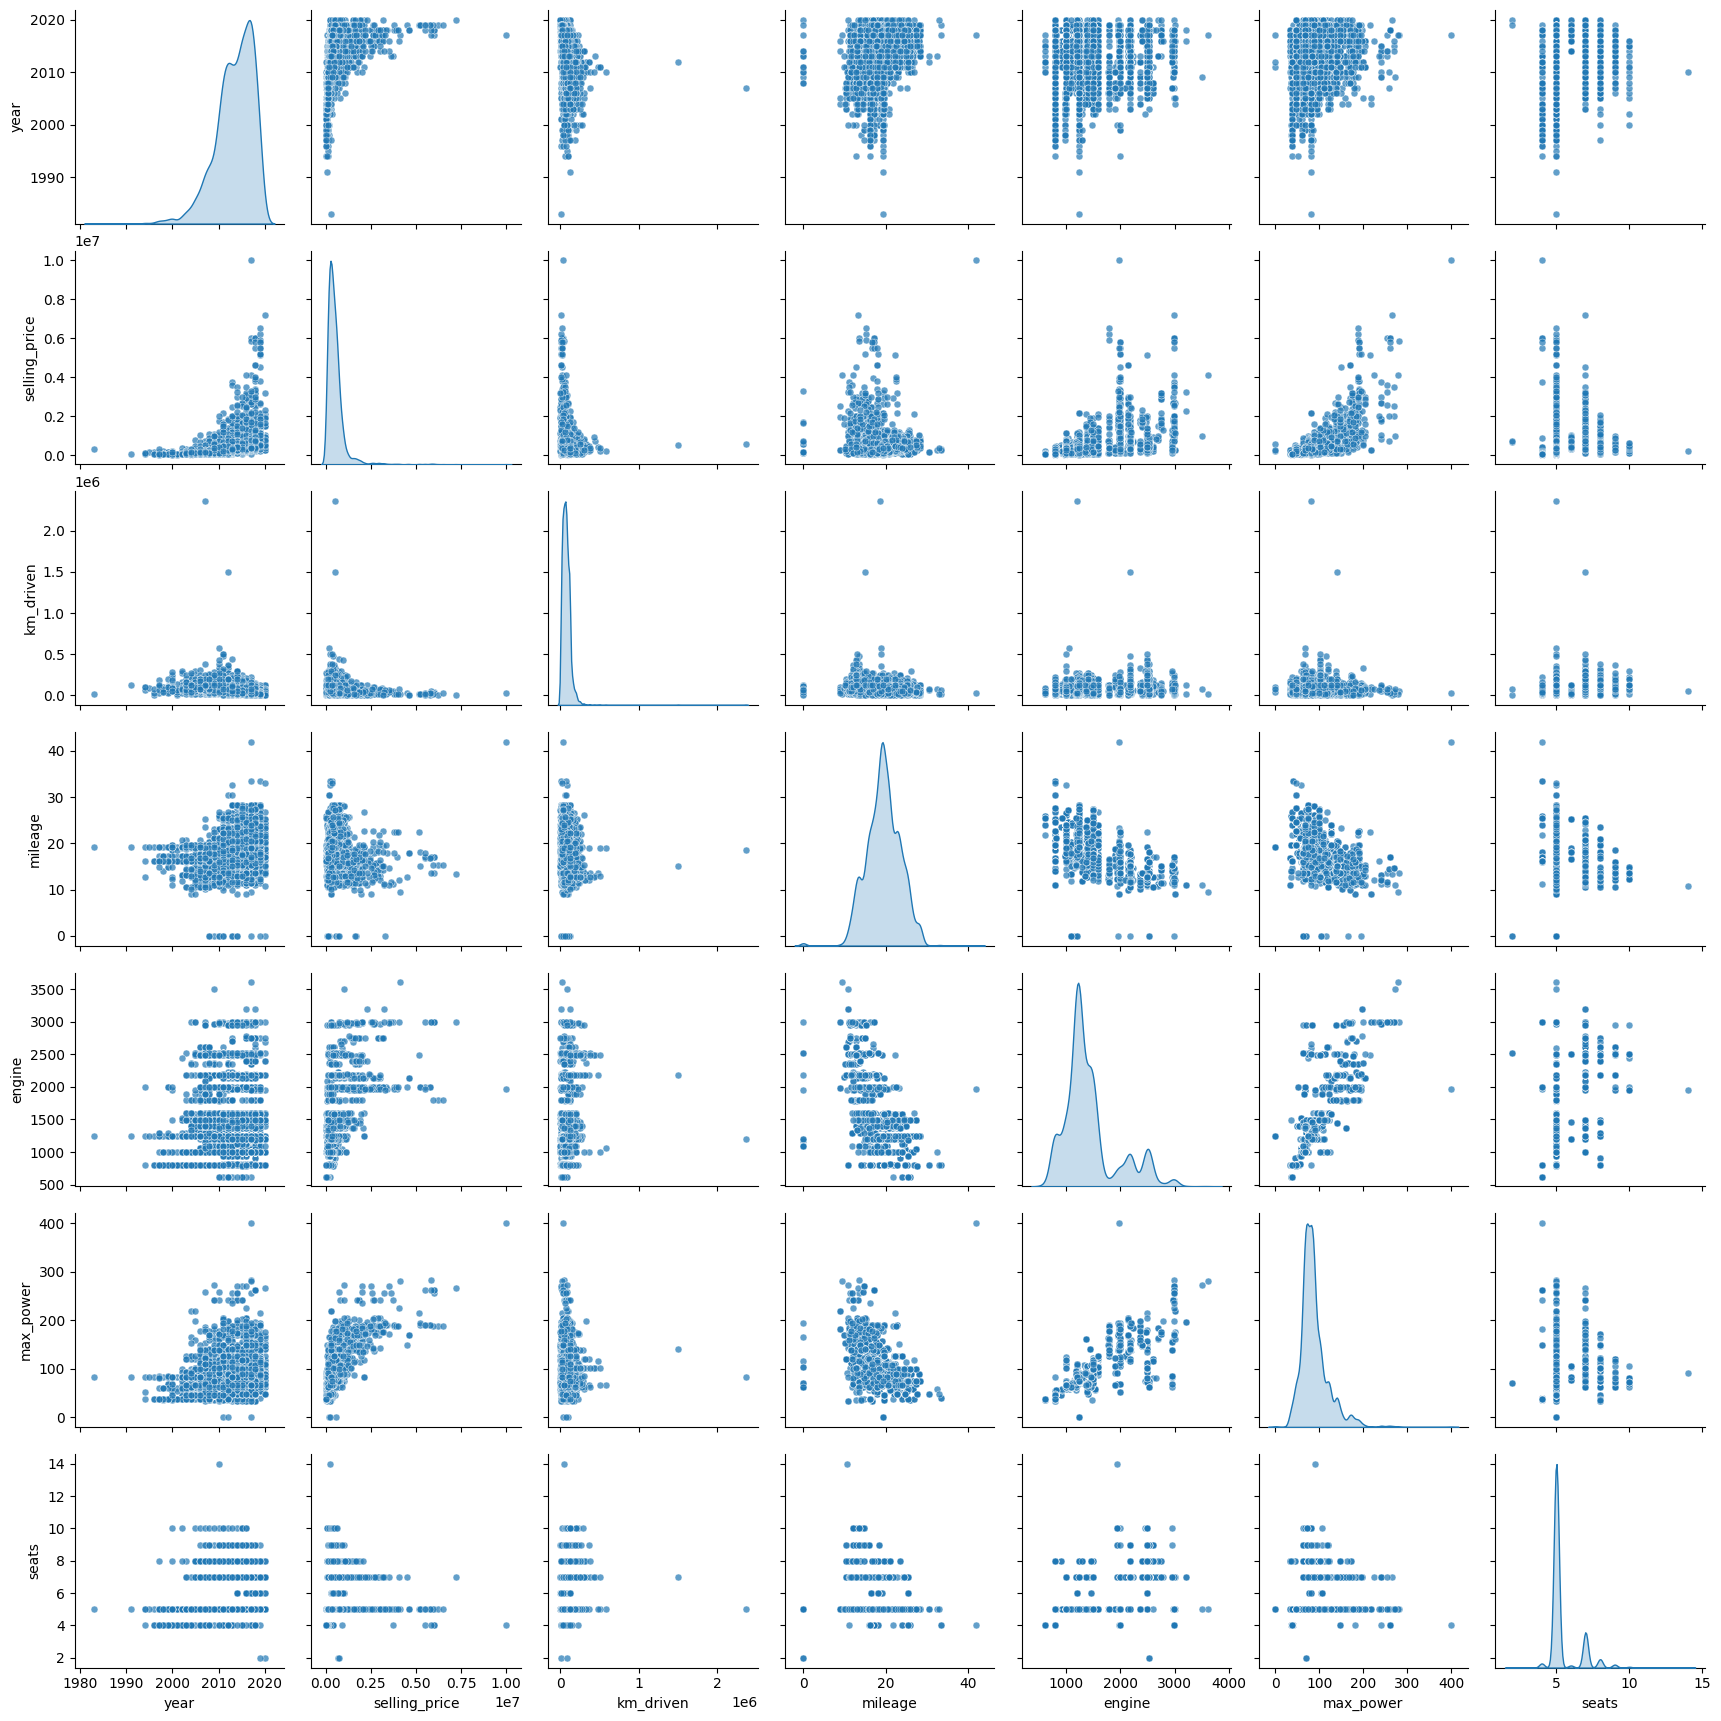

In [13]:
print("Pairplot для трейна:")
sns.pairplot(df_train.select_dtypes(include=['number']), diag_kind='kde', plot_kws={'alpha': 0.7, 's': 25})
plt.show()

Pairplot для теста выборки:


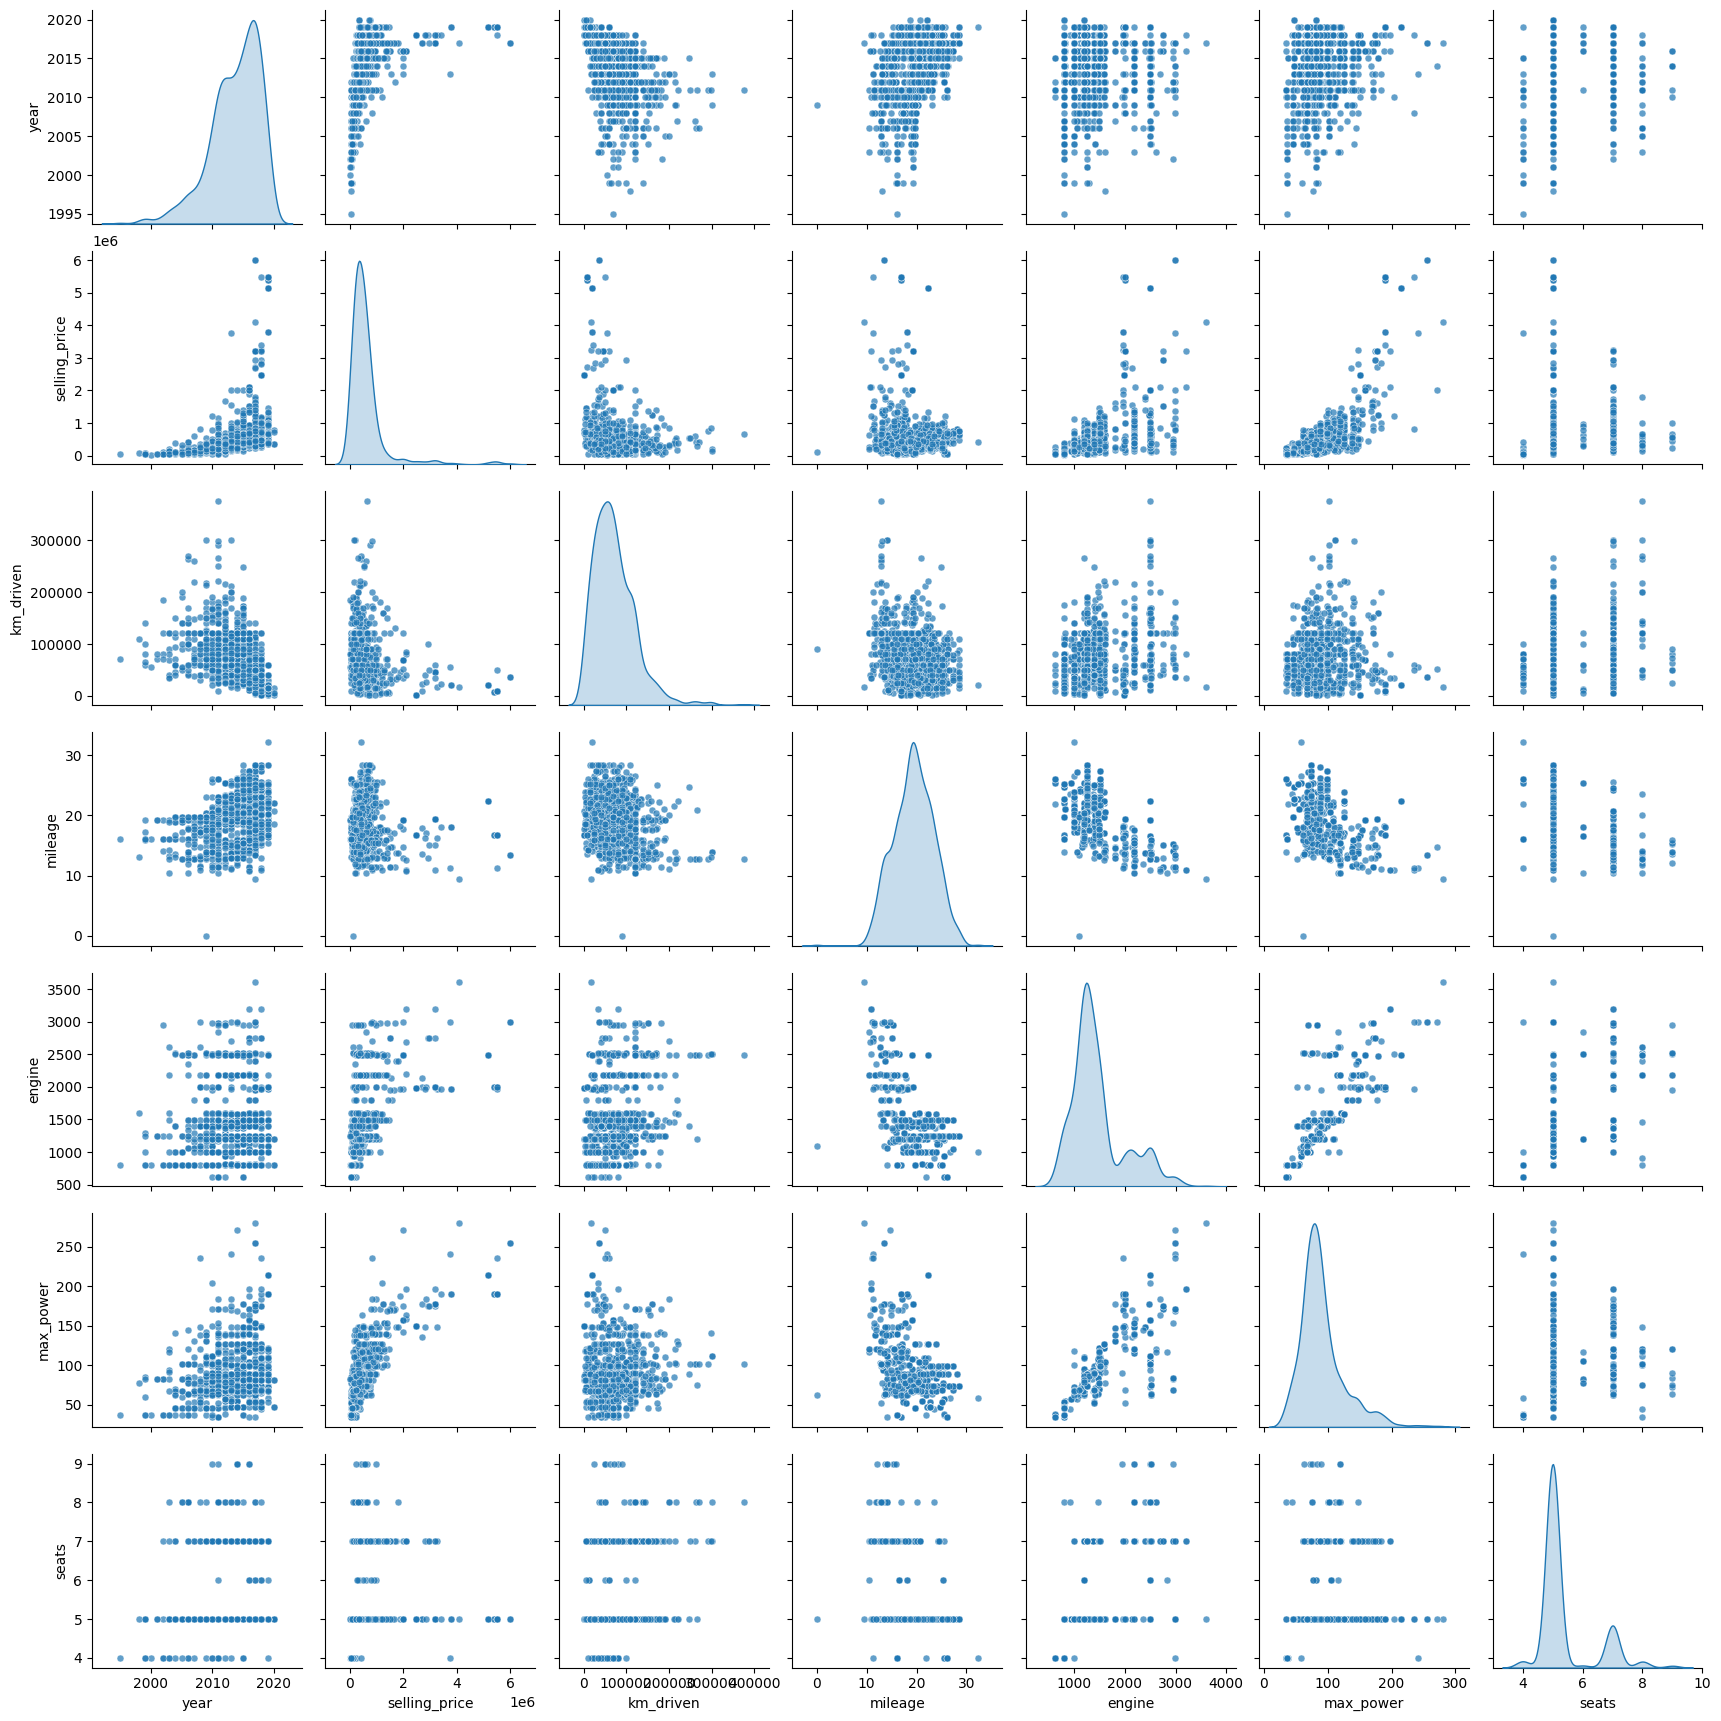

In [14]:
print("Pairplot для теста выборки:")
sns.pairplot(df_test.select_dtypes(include=['number']), diag_kind='kde', plot_kws={'alpha': 0.7, 's': 25})
plt.show()

***1. Видна связь признаков с целевой переменной:***
*   **Цена и мощность (`max_power`):** Наблюдается зависимость. Чем выше мощность, тем выше цена. Облако точек вытягивается по диагонали вверх.
*   **Цена и год (`year`):** Видна четкая положительная связь. Более новые машины стоят дороже.
*   **Цена и пробег (`km_driven`):** Связь отрицательная. Машины с большим пробегом стоят дешевле.

***2. Можно выдвинуть гипотезу о корреляции признаков:***
*   **`engine` и `max_power`:** Наблюдается сильная положительная линейная зависимость. Объем двигателя и его мощность очень связаны.

***3. Cовокупности при разделении на трейн и тест оказались похожими. Наблюдаются те же закономерности, которые были в трейне. Диаграммы рассеяния (scatterplots) похожи на те, что были в трейне. Это подтверждает вывод из предыдущего задания по `describe()`***

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


Матрица корреляций по Пирсону:


,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.342172,0.002819,0.156648,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104458,0.447672,0.692754,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182245,0.229766,0.024630,0.192328
mileage,0.342172,-0.104458,-0.182245,1.000000,-0.572677,-0.373271,-0.450810
engine,0.002819,0.447672,0.229766,-0.572677,1.000000,0.681082,0.652172
max_power,0.156648,0.692754,0.024630,-0.373271,0.681082,1.000000,0.244060
seats,0.041178,0.149953,0.192328,-0.450810,0.652172,0.244060,1.000000


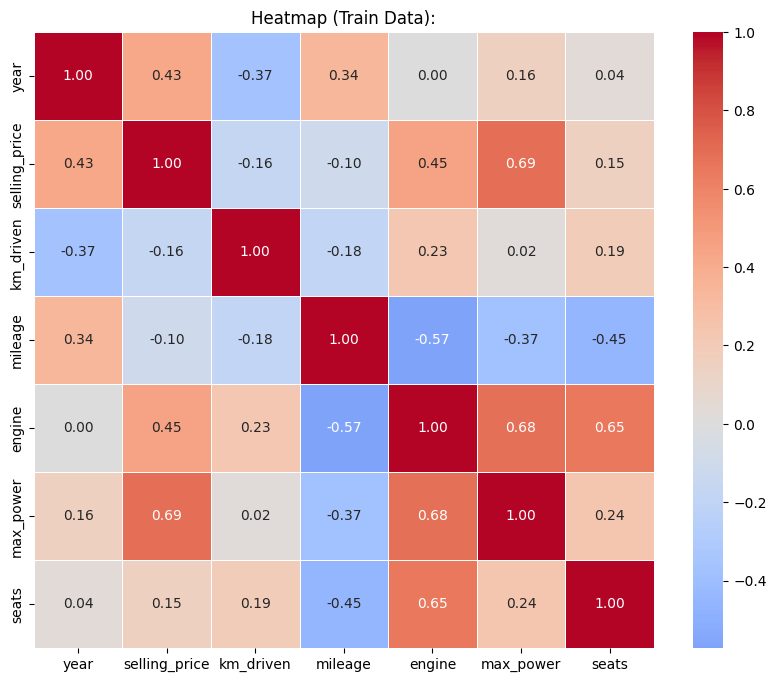

In [15]:
numeric_train = df_train.select_dtypes(include=['number'])

print("Матрица корреляций по Пирсону:")
display(corr_matrix := numeric_train.corr(method='pearson'))

# Тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,        # писать значения в ячейках
            cmap='coolwarm',   # цветовая гамма (синий - отрицательная, красный - положительная)
            fmt=".2f",         # 2 знака после запятой
            linewidths=0.5,    # ширина разделительных линий
            center=0)          # белый цвет это нулевая корреляции

plt.title("Heatmap (Train Data):")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

***1. Это признаки **`year`** и **`engine`:*****
*   Коэффициент корреляции между ними составляет **0.002819**. Это значение ближе всего по модулю к нулю из всей таблицы, что говорит об отсутствии линейной связи.

***2. Можно выделить несколько пар (коэффициент > 0.6):***
*   **`selling_price` и `max_power`** – самая сильная положительная линейная зависимость в матрице – чем мощнее машина, тем она дороже.
*   **`engine` и `max_power`** – объем двигателя и мощность очень связаны.
*   **`engine` и `seats`** – у машин с большим объемом двигателя часто больше мест.

***3. Да, если опираться на матрицу корреляций по Пирсону, то правильно:***
*   Коэффициент корреляции между `year` и `km_driven` равен **-0.368966** (отрицательный). Отрицательная корреляция означает обратную зависимость: чем **больше** год (новее машина), тем **меньше** пробег. И наоборот: чем **меньше** год (старее машина), тем **больше** пробег.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

### **Распределение целевой переменной**

*****Обоснование**: Линейная регрессия плохо работают с данными, имеющими сильную асимметрию. Если распределение цены не похоже на нормальное, модель будет сильно ошибаться на дорогих автомобилях***

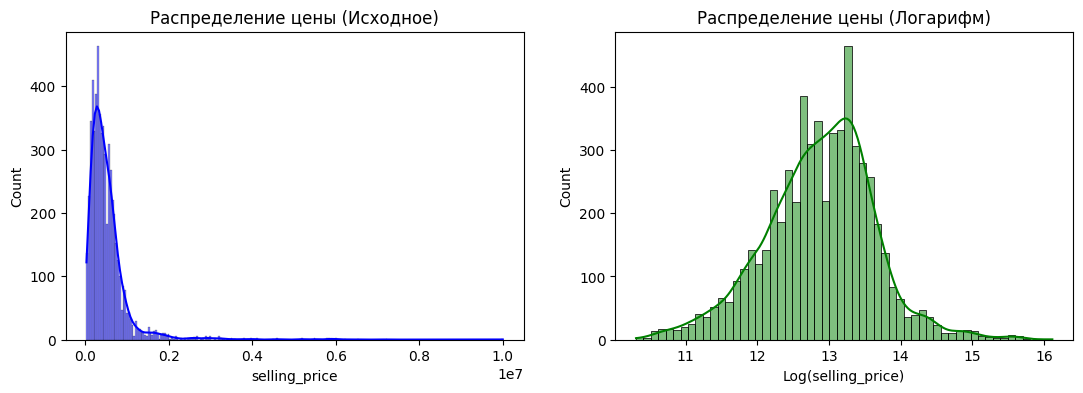

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

# Исходное распределение цены: видно, что далеко не нормальное
sns.histplot(df_train['selling_price'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Распределение цены (Исходное)')
axes[0].set_xlabel('selling_price')

# Логарифмированное распределение: видно, что ближе к нормальному => при обучении модели целевую переменную selling_price следует логарифмировать
sns.histplot(np.log(df_train['selling_price']), kde=True, ax=axes[1], color='green')
axes[1].set_title('Распределение цены (Логарифм)')
axes[1].set_xlabel('Log(selling_price)')

plt.show()

### **Влияние категориальных признаков (Boxplots)**

*****Обоснование**: Корреляция Пирсона работает только с числами. Полезно понимать, как (относительно) влияет тот или иной категориальный признак на фичу. Boxplot (ящик с усами) позволит сравнить медианные цены разных групп***

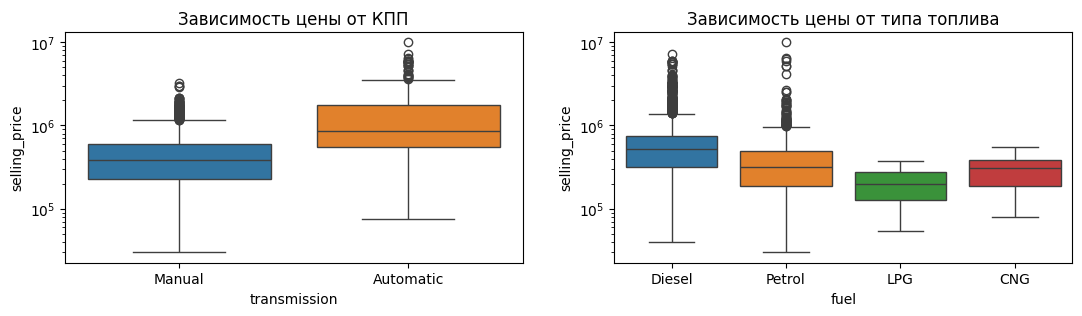

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(13, 3))

# Цена и трансмиссия
sns.boxplot(
    x='transmission', 
    y='selling_price', 
    hue='transmission',   
    data=df_train, 
    ax=axes[0], 
)
axes[0].set_title('Зависимость цены от КПП')
axes[0].set_yscale('log') # логарифмическая шкала, чтобы все не сплющило) 

# Цена и тип топлива
sns.boxplot(
    x='fuel', 
    y='selling_price', 
    hue='fuel',     
    data=df_train, 
    ax=axes[1], 
)
axes[1].set_title('Зависимость цены от типа топлива')
axes[1].set_yscale('log')

plt.show()

***Видно, что медианная цена у машин с автоматической коробкой передач выше, чем у машин с механической.***

***Машины, которые ездят на дизельном топливе, как правило, стоят дороже, чем остальные. Использование логарифмической шкалы позволяет отчетливо увидеть эти различия, которые на обычной шкале слились бы из-за выбросов***

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [18]:
# Список числовых признаков
numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

# Формирую матрицы признаков (X)
X_train = df_train[numeric_features].copy()
X_test = df_test[numeric_features].copy()

# Формирую вектор целевой переменной (y)  
# Применяю логарифм, чтобы исправить перекос распределения (сделать его нормальным) — см. предыдущий пункт
y_train = np.log(df_train['selling_price'])
y_test = np.log(df_test['selling_price'])

print("Размеры обучающей выборки:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("Размеры тестовой выборки:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Размеры обучающей выборки:
X_train: (5840, 6)
y_train: (5840,)
Размеры тестовой выборки:
X_test: (1000, 6)
y_test: (1000,)


***<center>Описание выбранных числовых признаков (для формирования текста описания использовал нейронку — Gemini):</center>***
1.  **`year` (Год выпуска)**
    *   **Смысл:** Характеризует возраст автомобиля.
    *   **Ожидание:** Чем новее машина (больше год), тем выше цена. Это один из самых сильных признаков, так как он напрямую отражает амортизацию.

2.  **`km_driven` (Пробег)**
    *   **Смысл:** Показывает степень износа автомобиля.
    *   **Ожидание:** Отрицательная корреляция с ценой. Чем больше пробег, тем дешевле автомобиль (при прочих равных).

3.  **`max_power` (Максимальная мощность)**
    *   **Смысл:** Характеристика производительности двигателя (в л.с.).
    *   **Ожидание:** Самый сильный предиктор цены. Мощные машины (спорткары, премиум-класс) стоят значительно дороже.

4.  **`engine` (Объем двигателя)**
    *   **Смысл:** Техническая характеристика (в куб. см).
    *   **Ожидание:** Положительная корреляция с ценой. Обычно чем больше объем, тем выше класс авто. 
    *   *****Комментрай от хомосапиенс**: Данный признак сильно коррелирует с `max_power`, стоит учесть это при интерпретации весов линейной модели***

5.  **`mileage` (Расход топлива / Экономичность)**
    *   **Смысл:** Сколько километров машина проезжает на единицу топлива.
    *   **Ожидание:** Часто имеет обратную зависимость: дорогие мощные машины потребляют много топлива (низкий mileage), а дешевые малолитражки — экономичны (высокий mileage).

6.  **`seats` (Количество мест)**
    *   **Смысл:** Вместимость салона.
    *   **Ожидание:** Помогает различать классы авто (2 места — купе/спорт, 5 — седан, 7+ — минивэн/внедорожник). Корреляция с ценой бывает слабой, но признак может быть полезен в комбинации с другими.

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [19]:
# Обучение модели
model_lr = LinearRegression() # дефолтные параметры
model_lr.fit(X_train, y_train)

# Предсказание (модель предсказывает логарифм цены)
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

# Расчет метрик
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Вывод результатов
print(f"R^2  Train: {r2_train:.6f}")
print(f"R^2  Test:  {r2_test:.6f}")
print(f"MSE Train: {mse_train:.6f}")
print(f"MSE Test:  {mse_test:.6f}")

R^2  Train: 0.823565
R^2  Test:  0.859478
MSE Train: 0.103106
MSE Test:  0.100517


***$R^2 > 0.8$ — отличный результат для модели, которая обучалась **только на числовых признаках**. Это значит, что год выпуска и мощность двигателя являются определяющими факторами цены автомобиля. Значение $MSE$ кажется маленьким (около 0.1), но нужно не забывать, что это ошибка логарифма.***


***Интересная ситуация также заключается в том, что прогноз по тесту получился лучше, чем по трейну. Это подтверждает то, что было в EDA. В трейне были жесткие выбросы (машина с пробегом 2 млн км, странные цены и т.п.). Линейная регрессия пытается подстроиться под них, поэтому общая ошибка на трейне растет. В тесте выборка оказалась лучше (меньше аномальных значений)***

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [20]:
scaler = StandardScaler()

# fit ТОЛЬКО на тренировочных данных
scaler.fit(X_train)

# Применяю к обоим датасетам
# Перевожу обратно в DataFrame, т.к. transform возвращает numpy array
# В принципе обучаться она могла и на numpy array, но в дальнейшем, наверное, захотим посмотреть какой вес у какого признака
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Обучение модели
model_lr_scaled = LinearRegression()
model_lr_scaled.fit(X_train_scaled, y_train)

# Предсказание (модель предсказывает логарифм цены)
y_pred_train_scaled = model_lr_scaled.predict(X_train_scaled)
y_pred_test_scaled = model_lr_scaled.predict(X_test_scaled)

# Расчет метрик
r2_train_s = r2_score(y_train, y_pred_train_scaled)
r2_test_s = r2_score(y_test, y_pred_test_scaled)
mse_train_s = mean_squared_error(y_train, y_pred_train_scaled)
mse_test_s = mean_squared_error(y_test, y_pred_test_scaled)

# Вывод результатов (спойлер: ничего особо не поменялось, нам это будет нужно больше для интерпретации весов)
print("Метрики после стандартизации:")
print(f"R2  Train: {r2_train_s:.6f}")
print(f"R2  Test:  {r2_test_s:.6f}")
print(f"MSE Train: {mse_train_s:.6f}")
print(f"MSE Test:  {mse_test_s:.6f}")

Метрики после стандартизации:
R2  Train: 0.823565
R2  Test:  0.859478
MSE Train: 0.103106
MSE Test:  0.100517


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [21]:
# Таблица весов
weights_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Weight (Coefficient)': model_lr_scaled.coef_
})

# Сортирую веса по модулю от большего к меньшему
weights_df['Abs_Weight'] = weights_df['Weight (Coefficient)'].abs()
weights_df = weights_df.sort_values(by='Abs_Weight', ascending=False)

print("Веса модели на стандартизированных данных:")
display(weights_df[['Feature', 'Weight (Coefficient)']])

Веса модели на стандартизированных данных:


,Feature,Weight (Coefficient)
0,year,0.459851
4,max_power,0.324291
3,engine,0.170933
2,mileage,0.086765
5,seats,0.032425
1,km_driven,-0.013745


***Наиболее информативным (как и ожидалось) в предсказании цены оказался `year` выпуска автомобиля, следом идет `max_power`. Логично, что у `km_driven` отрицательный вес (чем больше пробег, тем ниже цена), правда значение довольно близко к нулевому. Скорее всего информация об износе уже косвенно содержится в годе выпуска, и линейная модель отдала предпочтение признаку `year`*** 

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [22]:
# Обучаю Lasso(alpha=0.01) 
# Пробовал с дефолтным параметром (alpha=1), все коэффициенты занулились, слишком жесткий штраф для логарифмированного таргета
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

# Предсказание (модель предсказывает логарифм цены)
y_pred_lasso_train = lasso.predict(X_train_scaled)
y_pred_lasso_test = lasso.predict(X_test_scaled)

# Расчет метрик
r2_train_l = r2_score(y_train, y_pred_lasso_train)
r2_test_l = r2_score(y_test, y_pred_lasso_test)
mse_train_l = mean_squared_error(y_train, y_pred_lasso_train)
mse_test_l = mean_squared_error(y_test, y_pred_lasso_test)

# Вывод результатов
print("Регуляризация Lasso:")
print(f"R2  Train: {r2_train_l:.6f}")
print(f"R2  Test:  {r2_test_l:.6f}")
print(f"MSE Train: {mse_train_l:.6f}")
print(f"MSE Test:  {mse_test_l:.6f}")

# Таблица весов
lasso_weights = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Weight (Lasso)': lasso.coef_,
    'Weight (Original)': model_lr_scaled.coef_ # для сравнения
})
display(lasso_weights)

Регуляризация Lasso:
R2  Train: 0.822363
R2  Test:  0.856521
MSE Train: 0.103809
MSE Test:  0.102632


,Feature,Weight (Lasso),Weight (Original)
0,year,0.465973,0.459851
1,km_driven,-0.000418,-0.013745
2,mileage,0.059862,0.086765
3,engine,0.157768,0.170933
4,max_power,0.315391,0.324291
5,seats,0.018240,0.032425


***При использовании Lasso с alpha=0.01 наблюдается эффект отбора признаков. Вес признака `km_driven` был стянут практически до нуля (-0.0004), что подтверждает его низкую значимость в присутствии `year`. Остальные веса немного уменьшились (эффект регуляризации), но ключевые драйверы цены (`year`, `max_power`) остались без изменений. Качество модели сохранилось на уровне обычной регрессии***

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [23]:
# Cетка параметров для перебора
# 1.0 было уже слишком, а 0.01 вроде неплохо
# Поэтому беру диапазон вокруг 0.01
param_grid = {'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]}

lasso = Lasso(random_state=42)

# Инициализирую GridSearchCV
# cv=10 -> 10 фолдов
# scoring='neg_mean_squared_error' -> минимизируем ошибку
grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    verbose=1, # чтобы видеть процесс обучения (от нейронки узнал)
    n_jobs=-1  # использовать все ядра процессора (от нейронки узнал)
)

# Фит на трейне (стандартизированном)
grid_search.fit(X_train_scaled, y_train)
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

print(f"Лучший параметр alpha: {best_alpha}")
print(f"Лучший score (MSE на кросс-валидации): {-grid_search.best_score_:.6f}") # ручной минус залетел, чтобы ошибка нормально отображалсь

# Веса лучшей модели
weights_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Weight': best_model.coef_
})
display(weights_df.sort_values(by='Weight', key=abs, ascending=False))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Лучший параметр alpha: 0.001
Лучший score (MSE на кросс-валидации): 0.104183


,Feature,Weight
0,year,0.460430
4,max_power,0.323395
3,engine,0.169661
2,mileage,0.084121
5,seats,0.031004
1,km_driven,-0.012427


***Сколько моделей обучено: 80 (8 кандидатов-альфа умножить на 10 фолдов).***

***Лучший параметр alpha: 0.001.***

***Зануление весов: Нет, ни один вес не стал равен 0. Это значит, что для минимизации ошибки модели нужны все признаки, даже `km_driven`, и сильная регуляризация здесь не требуется***

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [24]:
# l1_ratio: баланс между L1 и L2
param_grid_elastic = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'l1_ratio': [0.1, 0.5, 0.9] 
}

elastic = ElasticNet()

# Инициализирую GridSearchCV
grid_elastic = GridSearchCV(
    estimator=elastic,
    param_grid=param_grid_elastic,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Фит на трейне (стандартизированном)
grid_elastic.fit(X_train_scaled, y_train)


print(f"Лучшие параметры: {grid_elastic.best_params_}")
print(f"Лучший MSE: {-grid_elastic.best_score_:.6f}")

# Веса лучшей модели
best_elastic_model = grid_elastic.best_estimator_
weights_elastic = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Weight': best_elastic_model.coef_
})
display(weights_elastic.sort_values(by='Weight', key=abs, ascending=False))

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Лучшие параметры: {'alpha': 0.001, 'l1_ratio': 0.9}
Лучший MSE: 0.104185


,Feature,Weight
0,year,0.460321
4,max_power,0.323459
3,engine,0.169791
2,mileage,0.084389
5,seats,0.031155
1,km_driven,-0.012578


***Сколько моделей обучено: 150 (5 кандидатов-альфа умножить на 3 (кол-во параметров l1_ratio) и 10 фолдов).***

***Лучшие параметры: {'alpha': 0.001, 'l1_ratio': 0.9}***

***Зануление весов: Нет, ни один вес не стал равен 0. Это значит, что для минимизации ошибки модели нужны все признаки, даже `km_driven`, и сильная регуляризация здесь не требуется***

*****Вывод:** ElasticNet сошелся к тому, что лучшая модель — это модель, максимально близкая к простой линейной регрессии (слабая регуляризация). Веса не занулились.***

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [25]:
drop_cols = ['name', 'selling_price']

X_train_cat = df_train.drop(columns=drop_cols)
X_test_cat = df_test.drop(columns=drop_cols)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [26]:
assert X_train_cat.shape == (5840, 10)

In [27]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [28]:
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
num_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power']

# Инициализирую энкодер
# drop='first' — удаляет первый столбец (во избежании мультиколлинеарности)
# sparse_output=False — чтобы получить обычную таблицу, а не матрицу
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Обучаю энкодер ТОЛЬКО на категориальной части трейна
encoder.fit(X_train_cat[cat_cols])

# Получаю массивы чисел
train_encoded_array = encoder.transform(X_train_cat[cat_cols])
test_encoded_array = encoder.transform(X_test_cat[cat_cols])

# Превращаю массивы обратно в DataFrame с названиями колонок
# get_feature_names_out() автоматически дает имена типа 'fuel_Diesel', 'fuel_Petrol' и т.п.
train_encoded_df = pd.DataFrame(train_encoded_array, columns=encoder.get_feature_names_out(cat_cols), index=X_train_cat.index)
test_encoded_df = pd.DataFrame(test_encoded_array, columns=encoder.get_feature_names_out(cat_cols), index=X_test_cat.index)

# Конкатенирую числовые колонки и новые закодированные
X_train_ohe = pd.concat([X_train_cat[num_cols], train_encoded_df], axis=1)
X_test_ohe = pd.concat([X_test_cat[num_cols], test_encoded_df], axis=1)

print(f"Размерность Train: {X_train_ohe.shape}")
print(f"Размерность Test:  {X_test_ohe.shape}")

Размерность Train: (5840, 23)
Размерность Test:  (1000, 23)


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [29]:
# Ridge без скалирования работает плохо, поэтому снова стандартизирую данные
scaler_final = StandardScaler()
X_train_final = pd.DataFrame(scaler_final.fit_transform(X_train_ohe), columns=X_train_ohe.columns)

# Пробую широкий диапазон для параметра alpha
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100, 200, 500]}

ridge = Ridge()

# Инициализирую GridSearchCV
grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_ridge.fit(X_train_final, y_train)

best_r2 = grid_ridge.best_score_
print(f"Лучший параметр alpha: {grid_ridge.best_params_['alpha']}")
print(f"Лучший R^2 на кросс-валидации: {best_r2:.6f}")

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Лучший параметр alpha: 1
Лучший R^2 на кросс-валидации: 0.832550


In [30]:
# Лучшая модель из GridSearch
best_ridge = grid_ridge.best_estimator_

# Использую тот же скаляр для масштабирования данных
X_test_final = pd.DataFrame(scaler_final.transform(X_test_ohe), columns=X_test_ohe.columns)

# Предсказания на тестовой выборке
y_pred = best_ridge.predict(X_test_final)

# Считаю R^2 и MSE на тесте
final_r2_test = best_ridge.score(X_test_final, y_test)
final_mse_test = mean_squared_error(y_test, y_pred)

print(f"R^2 на тестовой выборке (Ridge + Cat): {final_r2_test:.6f}")
print(f"MSE на тестовой выборке (Ridge + Cat): {final_mse_test:.6f}")
print(f"R^2 на тестовой выборке (начальный результат): {r2_test:.6f}")
print(f"MSE на тестовой выборке (начальный результат): {mse_test:.6f}")

R^2 на тестовой выборке (Ridge + Cat): 0.871765
MSE на тестовой выборке (Ridge + Cat): 0.091728
R^2 на тестовой выборке (начальный результат): 0.859478
MSE на тестовой выборке (начальный результат): 0.100517


*****Вывод:** Добавление информации о коробке передач и типе топлива помогло модели лучше понимать ценообразование и снизить ошибку. Вполне вероятно, что предобработанный столбец `name` мог бы еще больше улучшить результат***

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [31]:
def business_metric(y_true, y_pred):
    # Считаю абсолютную относительную ошибку
    relative_error = np.abs((y_true - y_pred) / y_true)
    
    # Считаю долю случаев, где ошибка <= 0.10 (10%)
    metric_value = (relative_error <= 0.10).mean()
    
    return metric_value * 100  # возвращает в процентах

# Подготовка данных (цены из логарифмов в реальные деньги)
y_test_real = np.exp(y_test) 

# Обычная регрессия на числах (Baseline) 
y_pred_log_lr = model_lr_scaled.predict(X_test_scaled)
y_pred_real_lr = np.exp(y_pred_log_lr)
metric_lr = business_metric(y_test_real, y_pred_real_lr)

# Модель 2: Lasso (после GridSearch на числах)
y_pred_log_lasso = grid_search.best_estimator_.predict(X_test_scaled)
y_pred_real_lasso = np.exp(y_pred_log_lasso)
metric_lasso = business_metric(y_test_real, y_pred_real_lasso)

# Модель 3: Ridge (Числа + Категории)
y_pred_log_ridge = grid_ridge.best_estimator_.predict(X_test_final)
y_pred_real_ridge = np.exp(y_pred_log_ridge)
metric_ridge = business_metric(y_test_real, y_pred_real_ridge)

print(f"Доля верных прогнозов (точность 10%):")
print(f"1. Linear Regression (Numeric): {metric_lr:.1f}%")
print(f"2. Lasso (Numeric): {metric_lasso:.1f}%")
print(f"3. Ridge (Numeric + Cats): {metric_ridge:.1f}%")

# THE WINNER (также можно было оптимизировать GridSearchCV под бизнесовую метрику, результат наверняка был бы лучше):
best_model_name = "Ridge (с категориями)" if metric_ridge > metric_lr else "Linear Regression"
print(f"\nЛучшая модель для бизнеса: {best_model_name}")

Доля верных прогнозов (точность 10%):
1. Linear Regression (Numeric): 29.4%
2. Lasso (Numeric): 29.3%
3. Ridge (Numeric + Cats): 28.1%

Лучшая модель для бизнеса: Linear Regression


### ***<center>Вывод</center>***

1.  **Ridge** лучше минимизирует большие ошибки, что повышает $R^2$. Но регуляризация может вносить небольшое смещение в прогнозы для обычных объектов, из-за чего они выпадают за пределы строгого порога 10%.
2.  **Линейная регрессия** оказалась более удачливой в попадании в узкий коридор 10% точности, несмотря на то, что глобально её предсказания имеют большую дисперсию.

***На текущем этапе, если ключевым KPI является именно точность в пределах 10%, стоит использовать простую модель линейной регрессии.***

### **Сохранение обученной модели с числовыми объектами для инференса и параметрами скейлинга**

In [32]:
# Медианы нужны, чтобы заполнять пропуски в приложении так же, как в трейне
# Нюанс правда заключается в том, что сейчас это медианы уже заполненного датасета
# При заполнении пропусков медианой сама медиана распределения не меняется (или меняется ничтожно мало)
medians = {
    'mileage': df_train['mileage'].median(),
    'engine': df_train['engine'].median(),
    'max_power': df_train['max_power'].median(),
    'seats': df_train['seats'].median(),
    'year': df_train['year'].median(),
    'km_driven': df_train['km_driven'].median()
}

data_to_save = {
    'model': best_ridge,          # лучшая модель по гридсёрчу
    'scaler': scaler_final,       # Scaler, обученный на X_train_ohe
    'encoder': encoder,           # OneHotEncoder, обученный на категориях
    'medians': medians,           # медианы для заполнения пропусков
    'train_data': df_train        # очищенный трейн для отрисовки EDA в стримлите
}

# Сохранение в пикл-файлик
with open('model.pkl', 'wb') as f:
    pickle.dump(data_to_save, f)
print("Файл model.pkl успешно сохранен!")

Файл model.pkl успешно сохранен!


# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.